
# Яндекс.Музыка <a id="index"></a>

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс.Музыки вы сравните поведение пользователей двух столиц.

**Цель исследования** — проверьте три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей вы получите из файла `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Вы проверите данные на ошибки и оцените их влияние на исследование. Затем, на этапе предобработки вы поищете возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.



## Обзор данных

Составьте первое представление о данных Яндекс.Музыки.




Основной инструмент аналитика — `pandas`. Импортируйте эту библиотеку.

In [2]:
# импорт библиотеки pandas
import pandas as pd 
import seaborn as sns

Прочитайте файл `yandex_music_project.csv` из папки `/datasets` и сохраните его в переменной `df`:

In [3]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/yandex_music_project.csv') 

Выведите на экран первые десять строк таблицы: <a id="info"></a>

In [4]:
# получение первых 10 строк таблицы df
display(df.head(10))

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


Одной командой получить общую информацию о таблице:

In [5]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
  userID    65079 non-null object
Track       63848 non-null object
artist      57876 non-null object
genre       63881 non-null object
  City      65079 non-null object
time        65079 non-null object
Day         65079 non-null object
dtypes: object(7)
memory usage: 3.5+ MB


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. Не соблюдён змеиный стиль написания.



Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных
Исправьте стиль в заголовках столбцов, исключите пропуски. Затем проверьте данные на дубликаты.

### Стиль заголовков
Выведите на экран названия столбцов:

In [6]:
# перечень названий столбцов таблицы df

for column_name in df.columns:
    display(column_name) #при display, в отличие от print, видны границы, благодаря чему заметны лишние пробелы в конце

'  userID'

'Track'

'artist'

'genre'

'  City  '

'time'

'Day'

In [7]:
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

Приведите названия в соответствие с хорошим стилем:
* несколько слов в названии запишите в «змеином_регистре»,
* все символы сделайте строчными,
* устраните пробелы.

Для этого переименуйте колонки так:
* `'  userID'` → `'user_id'`;
* `'Track'` → `'track'`;
* `'  City  '` → `'city'`;
* `'Day'` → `'day'`.

In [8]:
# переименование столбцов
df = df.rename(columns={
    '  userID': 'user_id',
    'Track': 'track',
    '  City  ': 'city',
    'Day': 'day'
})

Проверьте результат. Для этого ещё раз выведите на экран названия столбцов:

In [9]:
# проверка результатов - перечень названий столбцов
for column_name_upd in df.columns:
    display(column_name_upd)

'user_id'

'track'

'artist'

'genre'

'city'

'time'

'day'

### Пропуски значений
Сначала посчитайте, сколько в таблице пропущенных значений. Для этого достаточно двух методов `pandas`:

In [10]:
# подсчёт пропусков
print(df.isna().sum())

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64


Не все пропущенные значения влияют на исследование. Так в `track` и `artist` пропуски не важны для вашей работы. Достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Придётся:
* заполнить и эти пропуски явными обозначениями,
* оценить, насколько они повредят расчётам. 

Замените пропущенные значения в столбцах `track`, `artist` и `genre` на строку `'unknown'`. Для этого создайте список `columns_to_replace`, переберите его элементы циклом `for` и для каждого столбца выполните замену пропущенных значений:

In [11]:
# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = ['track', 'artist', 'genre']
for column in columns_to_replace:
    df[column] = df[column].fillna('unknown')    

Убедитесь, что в таблице не осталось пропусков. Для этого ещё раз посчитайте пропущенные значения.

In [12]:
# подсчёт пропусков
print(df.isna().sum())

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64


### Дубликаты
Посчитайте явные дубликаты в таблице одной командой:

In [13]:
# подсчёт явных дубликатов
print(df.duplicated().sum())

3826


Вызовите специальный метод `pandas`, чтобы удалить явные дубликаты:

In [14]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df = df.drop_duplicates().reset_index(drop=True)

Ещё раз посчитайте явные дубликаты в таблице — убедитесь, что полностью от них избавились:

In [15]:
# проверка на отсутствие дубликатов
print(df.duplicated().sum())

0


Теперь избавьтесь от неявных дубликатов в колонке `genre`. Например, название одного и того же жанра может быть записано немного по-разному. Такие ошибки тоже повлияют на результат исследования.

Выведите на экран список уникальных названий жанров, отсортированный в алфавитном порядке. Для этого:
* извлеките нужный столбец датафрейма, 
* примените к нему метод сортировки,
* для отсортированного столбца вызовите метод, который вернёт уникальные значения из столбца.

In [16]:
# Просмотр уникальных названий жанров
unique_genres = df['genre'].sort_values()
display(unique_genres.unique())

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

Просмотрите список и найдите неявные дубликаты названия `hiphop`. Это могут быть названия с ошибками или альтернативные названия того же жанра.

Вы увидите следующие неявные дубликаты:
* *hip*,
* *hop*,
* *hip-hop*.

Чтобы очистить от них таблицу, напишите функцию `replace_wrong_genres()` с двумя параметрами: 
* `wrong_genres` — список дубликатов,
* `correct_genre` — строка с правильным значением.

Функция должна исправить колонку `genre` в таблице `df`: заменить каждое значение из списка `wrong_genres` на значение из `correct_genre`.

In [17]:
# Функция для замены неявных дубликатов
def replace_wrong_genres(wrong_genres, correct_genre):
    for wrong_genre in wrong_genres:
        df['genre'] = df['genre'].replace(wrong_genre, correct_genre)

Вызовите `replace_wrong_genres()` и передайте ей такие аргументы, чтобы она устранила неявные дубликаты: вместо `hip`, `hop` и `hip-hop` в таблице должно быть значение `hiphop`:

In [18]:
# Устранение неявных дубликатов
wrong_duplicates = ['hip', 'hop', 'hip-hop']
correct_unique = 'hiphop'
replace_wrong_genres(wrong_duplicates, correct_unique) #изменяем функцией несколько значений на одно

wrong_duplicates = ['ïîï', 'independent', 'rockindie']
correct_unique = 'indie'
replace_wrong_genres(wrong_duplicates, correct_unique)

#далее изменяем отдельные дубликаты. Для анализа не важно какое значение на какое изменяем.
df = df.replace('französisch', 'french')
df = df.replace('deutschspr', 'german')
df = df.replace('dancepop', 'popdance')
df = df.replace('türk', 'türkçe')
df = df.replace('rockalternative', 'alternative')
df = df.replace('trip', 'triphop')
df = df.replace('latin', 'latino')
df = df.replace('электроника', 'electronic')

Проверьте, что заменили неправильные названия:

*   hip
*   hop
*   hip-hop

Выведите отсортированный список уникальных значений столбца `genre`:

In [19]:
# Проверка на неявные дубликаты
unique_genres = df['genre'].sort_values()
display(unique_genres.unique())

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall', 'dark',
       'death', 'deep', 'deutschrock', 'dirty', 'disco', 'dnb',
       'documentary', 'downbeat', 'downtempo', 'drum', 'dub', 'dubstep',
       'eastern', 'easy', 'electronic', 'electropop', 'emo', 'entehno',
       'epicmetal', 'estrada', 'et

### Корректность данных

При просмотре значений в пункте с [выводом информации](#info) был обнаружен шестизначный `user_id` среди восьмизначных. Предполагается, что длина всех user_id должна быть одинаковой, восьмизначной. Необходимо уточнить у разработчика принцип присваивания user_id, но так как такая возможность отсутствует, проверяем длины user_id.

In [20]:
for id_length in range(10):
    counter = 0
    for index in range(61253):
        if len(df.loc[index,'user_id']) == id_length:
            counter += 1
    print('В массиве при длине user_id равной', id_length, 'количество строк:', counter)


В массиве при длине user_id равной 0 количество строк: 0
В массиве при длине user_id равной 1 количество строк: 0
В массиве при длине user_id равной 2 количество строк: 0
В массиве при длине user_id равной 3 количество строк: 0
В массиве при длине user_id равной 4 количество строк: 2
В массиве при длине user_id равной 5 количество строк: 11
В массиве при длине user_id равной 6 количество строк: 241
В массиве при длине user_id равной 7 количество строк: 3591
В массиве при длине user_id равной 8 количество строк: 57408
В массиве при длине user_id равной 9 количество строк: 0


Распределение похоже на случайную выборку натуральных чисел в диапазоне от 4-значных до 8-значных: каждое следующее количество увеличивается почти в 16 раз, что достоверно для шестнадцатиричной системы счисления. Ошибок в данных нет.

In [21]:
# вариант подсчета 🐼

df['len_user_id'] = df['user_id'].str.count(r'[0-9A-Za-z]')
(
    df
    .groupby('len_user_id')['user_id'].count()
    .sort_values(ascending = False)
    .reset_index()
)

# можно измерить скорость выполнения кода 😉

,len_user_id,user_id
0,8,57408
1,7,3591
2,6,241
3,5,11
4,4,2


**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Вы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения вы заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез. 

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверьте это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделите пользователей Москвы и Санкт-Петербурга
* Сравните, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


Для тренировки сначала выполните каждый из расчётов по отдельности. 

Оцените активность пользователей в каждом городе. Сгруппируйте данные по городу и посчитайте прослушивания в каждой группе.



In [21]:
# Подсчёт прослушиваний в каждом городе
tracks_in_city = df.groupby('city').count()
print(tracks_in_city['track'])

city
Moscow              42741
Saint-Petersburg    18512
Name: track, dtype: int64


В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

Теперь сгруппируйте данные по дню недели и подсчитайте прослушивания в понедельник, среду и пятницу. Учтите, что в данных есть информация только о прослушиваниях только за эти дни.


В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

day
Friday       21840
Monday       21354
Wednesday    18059
Name: track, dtype: int64


Text(0.5, 1.0, 'Количество прослушиваний по дням недели')

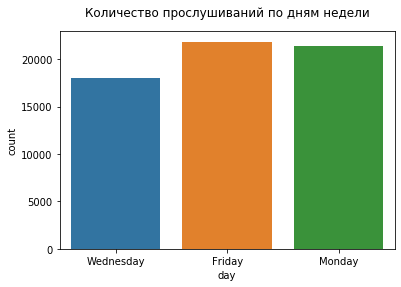

In [22]:
# Подсчёт прослушиваний в каждый из трёх дней
days = ['Monday', 'Wednesday', 'Friday']
print(df.groupby('day').count()['track'])
sns.countplot(df['day']).set_title('Количество прослушиваний по дням недели', pad=15)
    

Вы видели, как работает группировка по городу и по дням недели. Теперь напишите функцию, которая объединит два эти расчёта.

Создайте функцию `number_tracks()`, которая посчитает прослушивания для заданного дня и города. Ей понадобятся два параметра:
* день недели,
* название города.

В функции сохраните в переменную строки исходной таблицы, у которых значение:
  * в колонке `day` равно параметру `day`,
  * в колонке `city` равно параметру `city`.

Для этого примените последовательную фильтрацию с логической индексацией.

Затем посчитайте значения в столбце `user_id` получившейся таблицы. Результат сохраните в новую переменную. Верните эту переменную из функции.

In [23]:
# <создание функции number_tracks()>
def number_tracks(day, city):
    track_list = df[df['day'] == day]
    track_list = track_list[track_list['city'] == city]
    track_list_count = track_list['user_id'].count()
    return track_list_count

Вызовите `number_tracks()` шесть раз, меняя значение параметров — так, чтобы получить данные для каждого города в каждый из трёх дней.

In [24]:
cities = list(df['city'].unique()) #получение списков городов и дней недели
days = list(df['day'].unique())
days.insert(0, days[-1]) #меняем местами дни недели в правильном порядке
days.pop()

for city_value in cities:
    for day_value in days:
        print('В городе', city_value, 'в', day_value, 'количество прослушиваний:', number_tracks(day_value, city_value))

В городе Saint-Petersburg в Monday количество прослушиваний: 5614
В городе Saint-Petersburg в Wednesday количество прослушиваний: 7003
В городе Saint-Petersburg в Friday количество прослушиваний: 5895
В городе Moscow в Monday количество прослушиваний: 15740
В городе Moscow в Wednesday количество прослушиваний: 11056
В городе Moscow в Friday количество прослушиваний: 15945


Создайте c помощью конструктора `pd.DataFrame` таблицу, где
* названия колонок — `['city', 'monday', 'wednesday', 'friday']`;
* данные — результаты, которые вы получили с помощью `number_tracks`.

,monday,wednesday,friday
Saint-Petersburg,5614,7003,5895
Moscow,15740,11056,15945


Text(0.5, 1, 'Количество прослушиваний в городах в зависимости от дня недели')

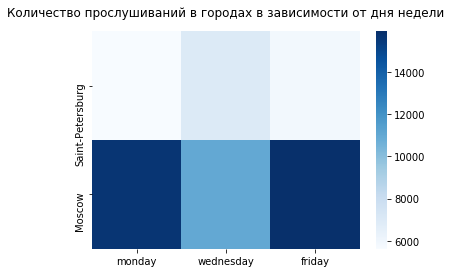

In [31]:
# Таблица с результатами
track_by_day_and_city_data = {'monday': {cities[0]: number_tracks(days[0], cities[0]), cities[1]: number_tracks(days[0], cities[1])},
                              'wednesday': {cities[0]: number_tracks(days[1], cities[0]), cities[1]: number_tracks(days[1], cities[1])},
                              'friday': {cities[0]: number_tracks(days[2], cities[0]), cities[1]: number_tracks(days[2], cities[1])},
                             }
city_day_frame = pd.DataFrame(track_by_day_and_city_data)
display(city_day_frame)
sns.heatmap(city_day_frame, cmap="Blues").set_title('Количество прослушиваний в городах в зависимости от дня недели', pad=15)

**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

Сохраните таблицы с данными в две переменные:
* по Москве — в `moscow_general`;
* по Санкт-Петербургу — в `spb_general`.

In [32]:
# получение таблицы moscow_general из тех строк таблицы df, 
# для которых значение в столбце 'city' равно 'Moscow'
moscow_general = df[df['city'] == 'Moscow']

In [33]:
# получение таблицы spb_general из тех строк таблицы df,
# для которых значение в столбце 'city' равно 'Saint-Petersburg'
spb_general = df[df['city'] == 'Saint-Petersburg']

Создайте функцию `genre_weekday()` с четырьмя параметрами:
* таблица (датафрейм) с данными,
* день недели,
* начальная временная метка в формате 'hh:mm', 
* последняя временная метка в формате 'hh:mm'.

Функция должна вернуть информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

In [34]:
def genre_weekday(table, day, time1, time2):
    genre_df = table[table['day'] == day]
    genre_df = genre_df[genre_df['time'] >= time1]
    genre_df = genre_df[genre_df['time'] <= time2]
    genre_df_count = genre_df.groupby('genre').count()['user_id']
    genre_df_sorted = genre_df_count.sort_values(ascending=False)
    return genre_df_sorted.head(10)

Cравните результаты функции `genre_weekday()` для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00):

In [35]:
# вызов функции для утра понедельника в Москве (вместо df — таблица moscow_general)
# объекты, хранящие время, являются строками и сравниваются как строки
# пример вызова: genre_weekday(moscow_general, 'Monday', '07:00', '11:00')
genre_weekday(moscow_general, 'Monday', '07:00', '11:00')

genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: user_id, dtype: int64

In [36]:
# вызов функции для утра понедельника в Петербурге (вместо df — таблица spb_general)
genre_weekday(spb_general, 'Monday', '07:00', '11:00')

genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: user_id, dtype: int64

In [37]:
# вызов функции для вечера пятницы в Москве
genre_weekday(moscow_general, 'Friday', '17:00', '23:00')

genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
classical      163
alternative    163
rusrap         142
Name: user_id, dtype: int64

In [38]:
# вызов функции для вечера пятницы в Петербурге
genre_weekday(moscow_general, 'Friday', '17:00', '23:00')

genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
classical      163
alternative    163
rusrap         142
Name: user_id, dtype: int64

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

Сгруппируйте таблицу `moscow_general` по жанру и посчитайте прослушивания треков каждого жанра методом `count()`. Затем отсортируйте результат в порядке убывания и сохраните его в таблице `moscow_genres`.

In [39]:
moscow_genres = moscow_general.groupby('genre').count()['user_id'].sort_values(ascending=False)

Выведите на экран первые десять строк `moscow_genres`:

In [40]:
# просмотр первых 10 строк moscow_genres
print(moscow_genres.head(10))

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1380
ruspop         1372
rusrap         1161
Name: user_id, dtype: int64


Теперь повторите то же и для Петербурга.

Сгруппируйте таблицу `spb_general` по жанру. Посчитайте прослушивания треков каждого жанра. Результат отсортируйте в порядке убывания и сохраните в таблице `spb_genres`:


In [41]:
# одной строкой: группировка таблицы spb_general по столбцу 'genre', 
# подсчёт числа значений 'genre' в этой группировке методом count(), 
# сортировка получившегося Series в порядке убывания и сохранение в spb_genres
spb_genres = spb_general.groupby('genre').count()['user_id'].sort_values(ascending=False)

Выведите на экран первые десять строк `spb_genres`:

In [42]:
# просмотр первых 10 строк spb_genres
print(spb_genres.head(10))

genre
pop            2431
dance          1932
rock           1879
electronic     1737
hiphop          960
alternative     650
classical       646
rusrap          564
ruspop          538
world           515
Name: user_id, dtype: int64


Для сравнения частоты прослушивания русского рэпа между двумя городами необходимо определить долю жанра от общего числа прослушиваний.

In [43]:
#находим долю русского рэпа от общего числа прослушиваний
spb_rusrap = spb_genres['rusrap'] / spb_genres.sum()
moscow_rusrap = moscow_genres['rusrap'] / moscow_genres.sum()
print('Доля русского рэпа в Санкт-Петербурге:', spb_rusrap)
print('Доля русского рэпа в Москве:', moscow_rusrap)

#считаем разницу в процентах, где 100% у Москвы
print('В Санкт-Петербурге русский рэп популярнее на', 100 / moscow_rusrap * spb_rusrap - 100, '%')

Доля русского рэпа в Санкт-Петербурге: 0.030466724286949007
Доля русского рэпа в Москве: 0.027163613392293114
В Санкт-Петербурге русский рэп популярнее на 12.160057084279714 %


**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп незначительно популярнее в Петербурге, разница несущественная. 


## Итоги исследования

Вы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.